In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col=0)
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv', index_col=0)

In [3]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Removing missing values

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_data.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [6]:
df = pd.concat([train_data , test_data])
df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu'], axis=1)

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum())

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [8]:
df.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [9]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [10]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
categorical_columns = df.select_dtypes(exclude=['int64','float64']).columns

In [12]:
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
df[categorical_columns] = df[categorical_columns].fillna('None')
        
df = df.fillna(0)

## Adding categorical columns

In [14]:
df = pd.get_dummies(df)
# corr = train_data.corr()

In [15]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'corr' is not defined

In [16]:
train = df[df.index.isin(train_data.index)]
test = df.drop(train_data.index)

In [40]:
test = test.drop(['SalePrice'], axis=1)

In [18]:
print(train.shape, test.shape, train_data.shape)

(1460, 287) (1459, 287) (1460, 80)


In [19]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
y = train.SalePrice
X = train.drop(['SalePrice'], axis=1)

<AxesSubplot:>

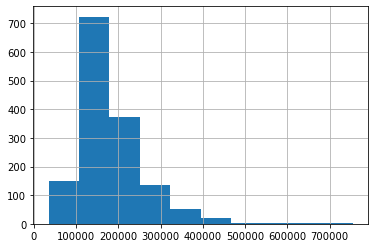

In [21]:
y.hist()

## Training

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
893,20,70.0,8414,6,8,1963,2003,0.0,663.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1106,60,98.0,12256,8,5,1994,1995,362.0,1032.0,0.0,...,0,0,0,1,0,0,0,0,1,0
414,30,56.0,8960,5,6,1927,1950,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
523,50,50.0,5000,6,7,1947,1950,0.0,399.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1037,20,89.0,12898,9,5,2007,2008,70.0,1022.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,50,115.0,21286,5,5,1948,1950,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
391,50,50.0,8405,5,8,1900,1950,0.0,241.0,391.0,...,0,0,0,1,0,0,0,0,1,0
1410,60,46.0,20544,7,6,1986,1991,123.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)


### Choosing the best parametres 

In [26]:
clf_rf = RandomForestClassifier()

In [27]:
parametrs = {'n_estimators': [10,15, 22, 24, 26], 'max_depth' : [7, 10, 13, 15], 
             'min_samples_leaf': range(1, 5)}

In [28]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [29]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
616,85,80.0,8800,6,7,1963,1963,156.0,763.0,0.0,...,0,0,0,1,1,0,0,0,0,0
614,20,70.0,8402,5,5,2007,2007,0.0,206.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1304,20,73.0,8688,7,5,2005,2005,228.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
487,20,79.0,10289,5,7,1965,1965,168.0,836.0,0.0,...,0,0,0,1,0,0,0,0,1,0
562,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,20,78.0,9317,6,5,2006,2006,0.0,24.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1131,50,65.0,7804,4,3,1928,1950,0.0,622.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1295,20,60.0,8172,5,7,1955,1990,0.0,167.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
y_train

Id
616     137500.0
614     147000.0
1304    232000.0
487     156000.0
562     170000.0
          ...   
1096    176432.0
1131    135000.0
1295    115000.0
861     189950.0
1127    174000.0
Name: SalePrice, Length: 978, dtype: float64

In [31]:
grid_search_cv_clf.fit(X_train, y_train)

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13, 15],
                         'min_samples_leaf': range(1, 5),
                         'n_estimators': [10, 15, 22, 24, 26]})

In [32]:
best_clf = grid_search_cv_clf.best_estimator_

In [33]:
best_clf.score(X_test, y_test)

0.006224066390041493

In [34]:
predict = best_clf.predict(X_test)

In [35]:
predict.shape

(482,)

### Calculate error

In [36]:
from sklearn.metrics import mean_squared_log_error


In [60]:
np.sqrt(mean_squared_log_error(y_test, prediction))

0.20609828434052457

In [38]:
y_test

Id
893     154500.0
1106    325000.0
414     115000.0
523     159000.0
1037    315500.0
          ...   
1011    135000.0
391     119000.0
1410    215000.0
848     133500.0
1285    169000.0
Name: SalePrice, Length: 482, dtype: float64

In [61]:
y_pred = rf.predict(test)

In [62]:
y_pred

array([129900., 141000., 192000., ..., 125000.,  84500., 250000.])

In [63]:
sample = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [64]:
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [65]:
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [66]:
test_data['SalePrice'] = y_pred

In [67]:
y_pred.shape

(1459,)

In [68]:
pred_df = test_data[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [69]:
pred_df

,SalePrice
Id,
1461,129900.0
1462,141000.0
1463,192000.0
1464,193000.0
1465,189000.0
...,...
2915,97000.0
2916,83500.0
2917,125000.0


In [70]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
pred_df.to_csv('out.csv')

/Users/yulialysenko/opt/anaconda3/lib/python3.7/zipfile.py:1506: UserWarning: Duplicate name: 'out.zip'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
